<a href="https://colab.research.google.com/github/rajeshmore1/Prudential-Life-Insurance-Data-Decision-Tree-XGB-RF-Models/blob/main/Rajesh_More_Self_Project_Copy_of_M3W2_Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

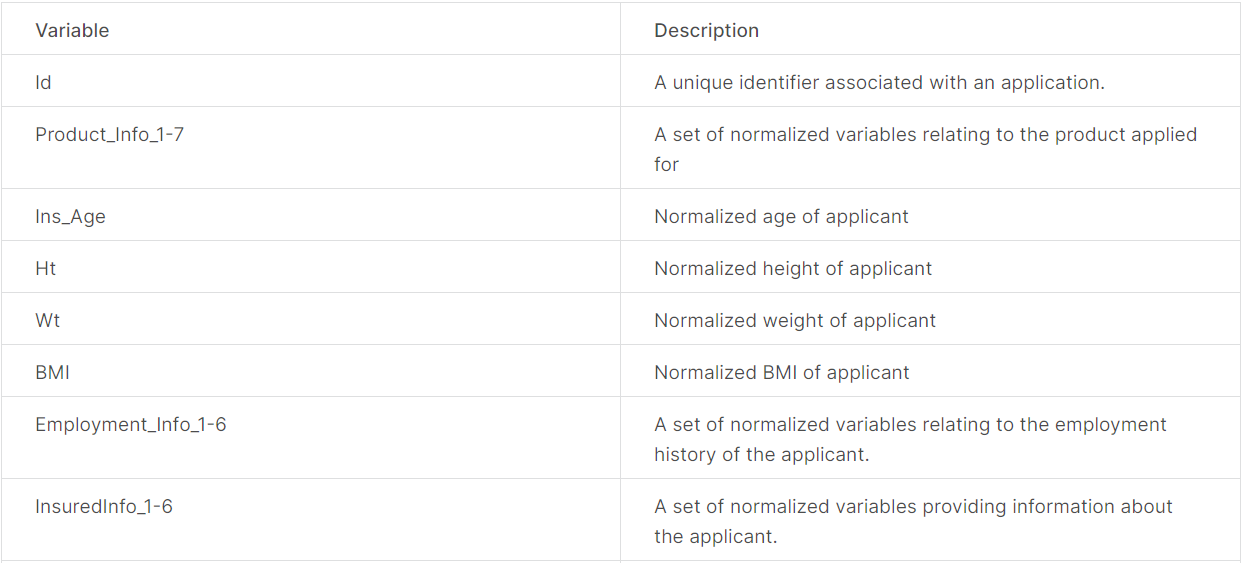

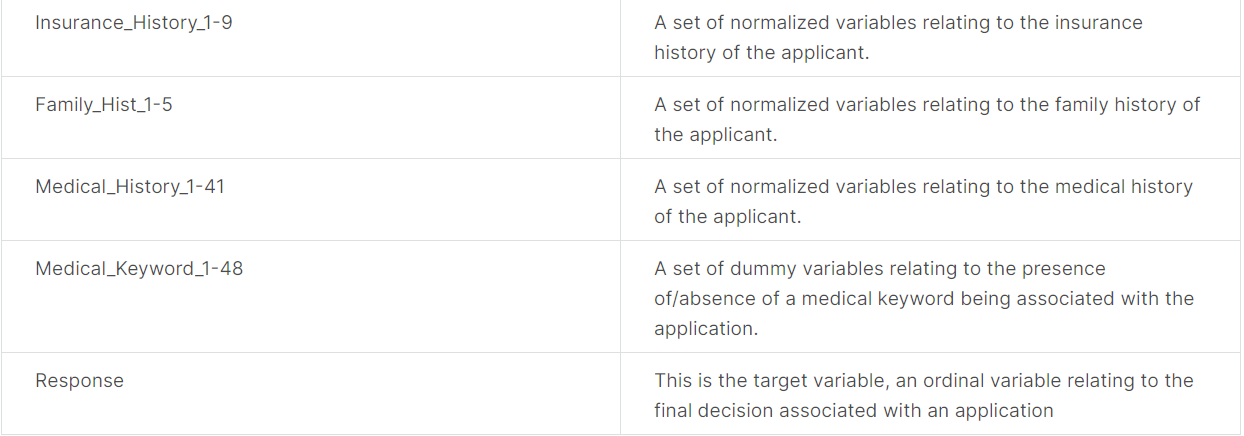

In [76]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Importing the dataset
insurance_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 2/Day 6/Copy of train.csv', index_col='Id')

In [38]:
insurance_df.head(20)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.0280,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.0000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.0300,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.0420,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.0270,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [39]:
insurance_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2

In [40]:
insurance_df.shape

(59381, 127)

In [41]:
insurance_df['Response'].min()

1

In [42]:
insurance_df['Response'].max()

8

In [43]:
insurance_df['Response'].value_counts

<bound method IndexOpsMixin.value_counts of Id
2        8
5        4
6        8
7        8
8        8
        ..
79142    4
79143    7
79144    8
79145    8
79146    7
Name: Response, Length: 59381, dtype: int64>

In [44]:
insurance_df.isnull().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_3 

In [45]:
insurance_df.dropna()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [46]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


In [47]:
# There are no null values in dataset
insurance_df.shape


(59381, 127)

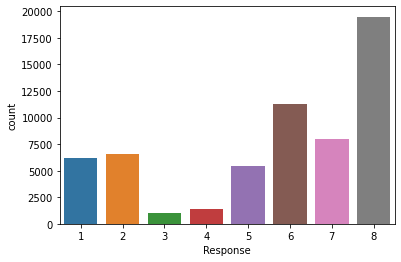

In [48]:
sns.countplot(x=insurance_df['Response'])

Observations from Target variable

Majority of data is for Response=8 , followed by 6,7,2

Lowest data is for Response=3,followed by 4

Response = 1,2,5 show almost same distribution of data

Target variable is "Response" and it has 8 classes - out of 8 data seems to be skewed towards class 8

For our exsercise, we will do a binary classification by altering the target variable.

 The new problem statement would be - Based on the attributes of customers, will the life insurance policy be approved or not i.e.yes(1) or no(0)

As a next step, we will create a new response variable, "Final_Response" in actual dataset

In [49]:
def modified_response(row):
  if ((row['Response']<=7) & (row['Response']>= 0)):
    val=0
  elif (row['Response']==8):
    val=1
  else:
    val = -1
  return val


In [50]:
insurance_df['Modified_Response']= insurance_df.apply(modified_response,axis=1)

In [51]:
insurance_df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

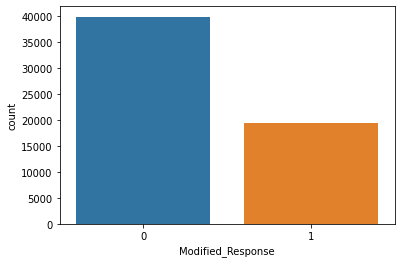

In [52]:
sns.countplot(x=insurance_df['Modified_Response'])

In [53]:
insurance_df.drop('Response',axis=1,inplace=True)

In [54]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [55]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [56]:
insurance_df.corr()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047371,0.032271,-0.039832,0.008507,-0.018840,0.011871,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.010613,0.006753,0.012547,0.008191,-0.001294,-0.054089,-0.017769,-0.056415,-0.013988,0.022124,0.005200,-0.017654,-0.022528,0.005489,0.008830,-0.000740,-0.002164,0.002007,-0.155339,-0.001493,-0.004357,0.007037,0.003845,-0.030431,0.006451,0.004598,0.001497,-0.009154,0.008965,0.001156,-0.004913,0.034479,-0.020301,-0.020741,0.022710,0.012216,-0.009307,0.004215,-0.007327,-0.007955,0.040738,-0.055632,-0.024576,-0.005298,-0.025444,-0.008999,0.012726,0.022837,-0.004703,0.015176,-0.013485,0.003356,-0.021427,-0.008578,0.005124,-0.001615,0.019955,0.000738,-0.005704,-0.002277,0.010436,0.004590,-0.001816,0.000856,-0.036699,-0.002719,-0.000372,0.008864,-0.007173,0.004998,0.007143,0.001019,0.055918,-0.001985,-0.018417,0.004536,-0.005395,-0.004660,-0.008189,-0.008202,-0.008154,0.002827,-0.006149,0.001988,-0.003620,-0.004441,0.007081,-0.007272,0.002378,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,-0.019621
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151442,0.191771,-0.241939,-0.026332,-0.764707,-0.005204,-0.033652,0.019398,-0.004991,-0.056197,0.026939,-0.398228,0.029694,0.009949,0.010795,0.033448,-0.022591,0.020219,-0.038518,0.038793,-0.032734,0.020843,-0.010492,0.010921,-0.001724,0.006095,0.009945,-0.033661,-0.041289,-0.090907,-0.004510,-0.045986,-0.005644,-0.006406,0.027212,0.024096,0.005088,-0.001422,0.055416,0.004776,-0.015096,0.009401,-0.003260,-0.018012,-0.071991,0.046969,-0.0

##Dropping the columns more than 40% null values


In [57]:
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [58]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [59]:
list(insurance_df.columns)

['Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16'

In [28]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 122 entries, Product_Info_1 to Modified_Response
dtypes: float64(13), int64(108), object(1)
memory usage: 58.2+ MB


In [60]:
insurance_df['Product_Info_2'].head(20)

Id
2     D3
5     A1
6     E1
7     D4
8     D2
10    D2
11    A8
14    D2
15    D3
16    E1
17    D3
18    D4
19    A2
20    D1
22    D4
23    A7
24    D4
25    D3
26    D3
27    D4
Name: Product_Info_2, dtype: object

In [61]:
insurance_df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [62]:
# Dropping Categorical column
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

# Start building baseline models (Logistic Regression,Random Forest Classifier & XGBoost Classifier)

In [66]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=121)

In [67]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']

In [68]:
X = X.fillna(X.mean())

In [69]:
X.shape, Y.shape

((59381, 120), (59381,))

#Splitting the data into train and test

In [70]:
# Training test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [71]:
#check the shape of train dataset
print(X_train.shape,Y_train.shape)
#check the shape of test dataset
print(X_test.shape,Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


In [72]:
X_train.isnull().sum()

Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0


In [82]:
Y_train.value_counts()

0    29907
1    14628
Name: Modified_Response, dtype: int64

In [83]:
Y_test.value_counts()

0    9985
1    4861
Name: Modified_Response, dtype: int64

# Fitting logistic regression on train data

In [84]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
clf.coef_

array([[-7.96165140e-01, -3.02229507e-03,  8.37677069e-01,
        -6.58227203e-01, -6.18882317e-02,  1.27881448e-01,
        -9.51049845e-01,  1.73912911e+00, -4.04185608e+00,
        -8.48579909e+00,  5.29094086e-02, -5.58321846e-04,
        -7.55800891e-02, -1.37688951e-01,  1.27872609e-01,
         9.02410295e-02, -2.02733169e-01, -2.28067521e+00,
        -3.38348879e-03,  1.30109929e-01, -4.17243725e-01,
         3.63214279e-01, -4.59545473e-01, -2.22437660e-01,
        -3.19241057e-01,  1.91314772e-01,  8.21089010e-02,
        -3.59656193e-02,  1.13691948e-01,  7.01701927e-02,
        -4.94429920e-03,  2.15495934e-01,  3.68537947e-01,
         1.22915673e+00,  4.18191322e-01,  3.34453414e-03,
         2.46559663e-04,  2.31059694e-01,  1.24005781e+00,
        -2.02510572e+00, -1.45420605e-02,  3.12002119e-01,
        -1.10284981e-01, -6.65784870e-02,  5.12982362e-01,
        -1.48603185e-01,  1.44561880e-01,  2.74168351e-01,
        -5.73911563e-03,  6.20974598e-01, -4.03866998e-0

In [86]:
clf.intercept_

array([-0.18735535])

* **Evaluating Performance of Logistic Regression Model**

In [87]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [88]:
X_test

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63651,1,26,0.282051,2,3,1,0.447761,0.763636,0.382845,0.560019,0.103,9,1,0.000,2,0.710000,1,2,2,3,1,1,1,2,1,3,2,0.000587,1,3,2,2,0.666667,0.497737,0.577465,1.0,575,2,1,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,1,1,3,3,1,1,2,3,3,3,1,2,2,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6330,1,10,0.538462,2,3,1,0.358209,0.672727,0.169456,0.287599,0.100,9,1,0.000,3,0.361469,1,2,6,3,1,2,1,2,1,3,1,0.001667,1,3,2,3,0.474550,0.049020,0.380282,0.0,181,2,2,1,3,2,2,2,3,2,3,3,1,3,2,1,2,1,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15237,1,26,0.282051,2,3,1,0.582090,0.818182,0.330544,0.425264,0.100,12,1,0.000,2,0.100000,1,2,6,3,1,1,1,1,1,3,1,0.003333,1,1,2,2,0.474550,0.421569,0.444890,18.0,491,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,3,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66154,1,10,1.000000,2,1,1,0.268657,0.727273,0.292887,0.453578,0.000,1,3,0.000,3,0.100000,2,2,6,3,1,2,1,1,1,3,1,0.001976,1,1,2,2,0.474550,0.196078,0.366197,3.0,48,2,2,1,3,2,3,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,1,1,3,2,1,3,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4707,1,26,0.000000,2,3,1,0.686567,0.709091,0.251046,0.400535,0.060,9,1,0.000,2,0.100000,1,2,8,3,1,1,1,2,1,3,1,0.000060,1,3,2,3,0.474550,0.529412,0.444890,2.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,1,2,2,3,1,1,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [89]:
test_preds

array([[9.99889060e-01, 1.10939537e-04],
       [1.85033281e-01, 8.14966719e-01],
       [8.90957257e-01, 1.09042743e-01],
       ...,
       [6.72251504e-01, 3.27748496e-01],
       [7.24817927e-01, 2.75182073e-01],
       [4.02384507e-01, 5.97615493e-01]])

In [90]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [91]:
test_preds

array([1.10939537e-04, 8.14966719e-01, 1.09042743e-01, ...,
       3.27748496e-01, 2.75182073e-01, 5.97615493e-01])

In [92]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [93]:
train_class_preds

array([1, 0, 0, ..., 0, 1, 1])

In [95]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8130234646906928
The accuracy on test data is  0.809847770443217


[[26109  3798]
 [ 4529 10099]]


[Text(0, 0.5, 'Accepted'), Text(0, 1.5, 'Rejected')]

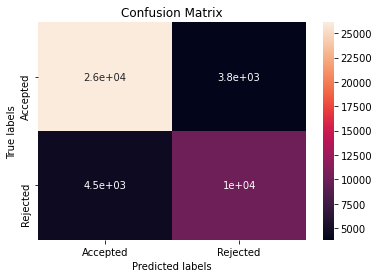

In [97]:
# Get the confusion matrix for both train and test
from sklearn.metrics import accuracy_score, confusion_matrix

labels = ['Accepted', 'Rejected']
cm = confusion_matrix(Y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8721 1264]
 [1559 3302]]


[Text(0, 0.5, 'Accepted'), Text(0, 1.5, 'Rejected')]

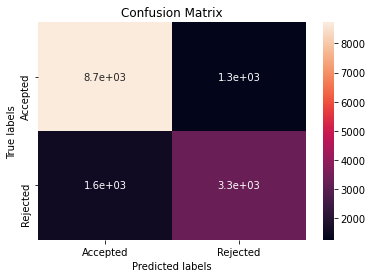

In [98]:
# Get the confusion matrix for both train and test

labels = ['Accepted', 'Rejected']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* **Implementing Cross-validated Logistic Regression**

In [99]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [100]:
logistic = LogisticRegression()

In [101]:
scoring = ['accuracy']
scores_logistic_regression = cross_validate(logistic,X_train, Y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.749, test=0.750), total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ............. , accuracy=(train=0.749, test=0.756), total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ............. , accuracy=(train=0.751, test=0.742), total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.745, test=0.745), total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV] ............. , accuracy=(train=0.748, test=0.741), total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s finished


# **Training A Random Forest Classifier**

In [103]:
# create an instance of random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Number of trees
n_estimators = [40,80,120]

# Maximum depth of trees
max_depth = [4,5,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [50,60]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [105]:
param_dict

{'max_depth': [4, 5, 8],
 'min_samples_leaf': [50, 60],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [40, 80, 120]}

In [106]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40, total=   0.9s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40, total=   0.8s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40, total=   0.8s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40, total=   0.8s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=40, total=   0.8s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80, total=   1.5s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80, total=   1.5s
[CV] max_depth=4, min_samples_leaf=50, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  8.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [107]:
rf_optimal_model= rf_grid.best_estimator_

In [108]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 120}

In [109]:
#making predictions
train_class_preds1= rf_optimal_model.predict(X_train)
test_class_preds1 = rf_optimal_model.predict(X_test)

train_preds1=rf_optimal_model.predict_proba(X_train)[:,1]
test_preds1=rf_optimal_model.predict_proba(X_test)[:,1]

In [110]:
len(train_preds1)

44535

In [111]:
test_class_preds1


array([0, 1, 0, ..., 0, 0, 1])

In [112]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
# Calculating accuracy on train and test
train_accuracy1 = accuracy_score(Y_train,train_class_preds1)
test_accuracy1 = accuracy_score(Y_test,test_class_preds1)

print("The accuracy on train dataset is", train_accuracy1)
print("The accuracy on test dataset is", test_accuracy1)

The accuracy on train dataset is 0.8085550690468171
The accuracy on test dataset is 0.8004849791189546


In [113]:
# Get the confusion matrices for train and test
train_cm1 = confusion_matrix(Y_train,train_class_preds1)
test_cm1 = confusion_matrix(Y_test,test_class_preds1 )

In [114]:
train_cm1


array([[27228,  2679],
       [ 5847,  8781]])

In [115]:
test_cm1

array([[9057,  928],
       [2034, 2827]])

In [116]:
#get the roc_auc score
train_auc= roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [117]:
train_auc

0.885316171408369

In [118]:
test_auc

0.8813783316406414

In [140]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
train_class_preds0= rf_model.predict(X_train)
test_class_preds0 = rf_model.predict(X_test)

In [144]:
train_class_preds0

array([0, 0, 1, ..., 0, 0, 0])

In [145]:
test_class_preds0

array([0, 1, 0, ..., 1, 0, 1])

In [146]:
train_preds0=rf_model.predict_proba(X_train)[:,1]
test_preds0=rf_model.predict_proba(X_test)[:,1]

In [147]:
# Calculating accuracy on train and test
train_accuracy0 = accuracy_score(Y_train,train_class_preds0)
test_accuracy0 = accuracy_score(Y_test,test_class_preds0)

print("The accuracy on train dataset is", train_accuracy0)
print("The accuracy on test dataset is", test_accuracy0)

The accuracy on train dataset is 0.9999775457505333
The accuracy on test dataset is 0.8287080695136737


# **Implementing XG Boost Classifier**

In [119]:
XGBoostModel =XGBClassifier(random_state=0)

XGBoostModel.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
# make predictions for test data
y_pred2 = XGBoostModel.predict(X_test)
predictions2 = [round(value) for value in y_pred2]

In [121]:
# evaluate predictions
accuracy2 = accuracy_score(Y_test, predictions2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 82.52%


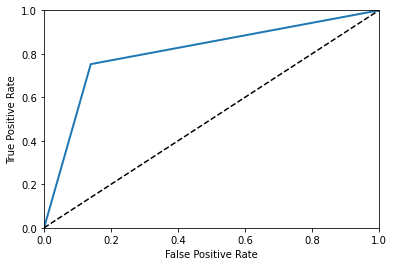

In [135]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,y_pred2)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

# **Implementing Decision Tree Classifier**

In [123]:
DTclassifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [124]:
y_predicted3 = DTclassifier.predict(X_test)

In [125]:
y_predicted3[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [126]:
Y_test[:10]

Id
63651    0
6330     1
15237    1
66154    1
4707     0
56864    1
18805    0
63245    0
12161    1
74127    1
Name: Modified_Response, dtype: int64

In [127]:
accuracy_score(Y_test, y_predicted3) * 100

80.3448740401455

In [128]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

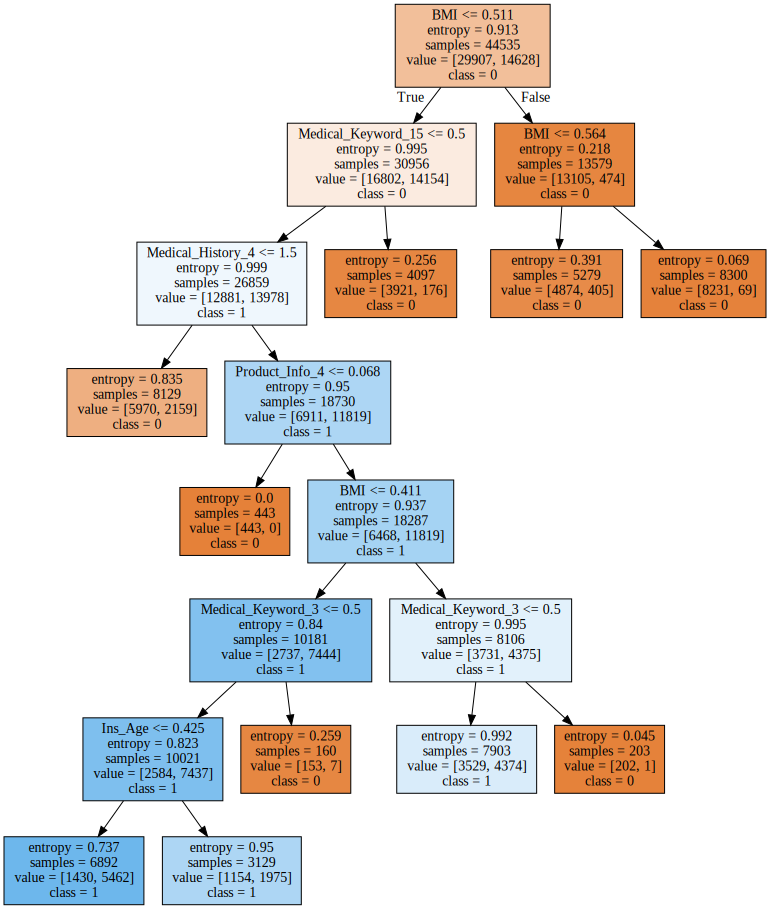

In [129]:
graph = Source(tree.export_graphviz(DTclassifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

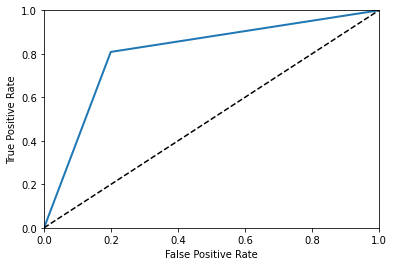

In [134]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,y_predicted3)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

# Evaluating Various Classifiers

In [77]:
#declare the models
dt=DecisionTreeClassifier(random_state=0)
rf=RandomForestClassifier(random_state=0)
lr=LogisticRegression(random_state=0)
bgc=ensemble.BaggingClassifier()
gbc=ensemble.GradientBoostingClassifier()
xgb=XGBClassifier(random_state=0)

In [78]:
#create a list of models
models=[dt,rf,lr,bgc,gbc,xgb]

def score_model(X_train,Y_train,X_test,Y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,Y_train)
        y_pred=model.predict(X_test)
        
        #compute metrics
        train_accuracy=model.score(X_train,Y_train)
        test_accuracy=model.score(X_test,Y_test)
        
        p_score=metrics.precision_score(Y_test,y_pred)
        r_score=metrics.recall_score(Y_test,y_pred)
        f1_score=metrics.f1_score(Y_test,y_pred)
        fp, tp, th = metrics.roc_curve(Y_test, y_pred)

        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [80]:
report_no_null=score_model(X_train,Y_train,X_test,Y_test)
report_no_null

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
4,GradientBoostingClassifier,0.73,0.75,0.83,0.83,0.74,0.805940
5,XGBClassifier,0.72,0.75,0.83,0.83,0.74,0.806608
1,RandomForestClassifier,0.75,0.70,1.00,0.83,0.73,0.794083
3,BaggingClassifier,0.73,0.65,0.99,0.81,0.69,0.766682
0,DecisionTreeClassifier,0.63,0.64,1.00,0.76,0.64,0.728815
2,LogisticRegression,0.64,0.52,0.75,0.75,0.57,0.688932


# Conclusion

**Gradient Boosting Classifier and XG boost classifier has the highest F1 score and AUC ROC score.**

Logistic Regression has the least F1 score but has same accuracy on test and train data. We got highest test accuracy when used these three models- XGB,RandomForest and GB classifier. We get highest precision when we use Random Forest classifier.